In [1]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import glob

In [2]:
pickleFiles = glob.glob('../*.p')

pickleFiles

['../issues_cookie prompt.p',
 '../issues_data privacy.p',
 '../issues_pseudonymization.p',
 '../issues_consent withdrawal.p',
 '../issues_privacy notice.p',
 '../issues_personally identifiable information.p',
 '../issues_privacy controls.p',
 '../issues_anonymization.p',
 '../issues_privacy policy.p',
 '../issues_right to be forgotten.p',
 '../issues_data breach.p',
 '../issues_privacy violation.p',
 '../issues_privacy problem.p',
 '../issues_ePrivacy Directive.p',
 '../issues_cookie banner.p',
 '../issues_tracking.p',
 '../issues_CCPA.p',
 '../issues_privacy breach.p',
 '../issues_privacy settings.p',
 '../issues_data sharing.p',
 '../issues_GDPR.p',
 '../issues_fingerprinting.p',
 '../issues_cookie notice.p',
 '../issues_privacy issue.p',
 '../issues_privacy law.p',
 '../issues_personal data.p',
 '../issues_PII.p',
 '../issues_cookie law.p',
 '../issues_data protection.p',
 '../issues_privacy act.p']

In [3]:
dfList = []

for path in pickleFiles:
    issues = pd.DataFrame(pickle.load(open(path, 'rb')))
    keyword = path[path.index('_') + 1: path.index('.p')]
    issues['keywords'] = keyword

    dfList.append(issues)

df_full = pd.concat(dfList)

In [4]:
df_full.shape

(37191, 6)

In [6]:
df = df_full.copy()

In [7]:
df['keywords'] = df[['url','keywords']].groupby(['url'])['keywords'].transform(lambda x: f'{list(set(x))}')

In [8]:
df = df.copy()
df.drop_duplicates(subset='url', inplace=True)

In [9]:
df.iloc[9].url

'https://api.github.com/repos/duckduckgo/privacy-configuration/issues/327'

In [10]:
len(df.groupby('url').url.nunique())

21608

In [13]:
import xlsxwriter

df_full.to_excel('df_full.xlsx', engine="xlsxwriter")
pickle.dump(df_full, open('df_full.p', 'wb'))

df.to_excel('df.xlsx', engine="xlsxwriter")
pickle.dump(df, open('df.p', 'wb'))

In [11]:
df

,url,created_at,title,issue,comments,keywords
0,https://api.github.com/repos/duckduckgo/privac...,2022-07-30 06:17:39,🍪 Cookie Prompt Management usability issues,{'url': 'https://api.github.com/repos/duckduck...,[],"['cookie prompt', 'privacy issue']"
1,https://api.github.com/repos/WaterfoxCo/Waterf...,2017-09-02 13:52:15,Reintroduce cookie prompting,{'url': 'https://api.github.com/repos/Waterfox...,[{'url': 'https://api.github.com/repos/Waterfo...,['cookie prompt']
2,https://api.github.com/repos/resonatecoop/stre...,2021-08-03 13:44:21,Change wording of cookies prompt,{'url': 'https://api.github.com/repos/resonate...,[{'url': 'https://api.github.com/repos/resonat...,['cookie prompt']
3,https://api.github.com/repos/brave/browser-lap...,2017-08-10 05:51:12,Feature request: Implement cookie prompts,{'url': 'https://api.github.com/repos/brave/br...,[],['cookie prompt']
4,https://api.github.com/repos/duckduckgo/Androi...,2022-12-19 10:17:16,POC - testing CPM secondary screen,{'url': 'https://api.github.com/repos/duckduck...,[],['cookie prompt']
...,...,...,...,...,...,...
466,https://api.github.com/repos/EFForg/action-cen...,2017-09-11 21:18:11,Radio styles are a little messed up,{'url': 'https://api.github.com/repos/EFForg/a...,[{'url': 'https://api.github.com/repos/EFForg/...,['privacy act']
467,https://api.github.com/repos/ualbertalib/jupit...,2018-02-21 14:55:50,era-beta: item detail (generic and thesis),{'url': 'https://api.github.com/repos/ualberta...,[{'url': 'https://api.github.com/repos/ualbert...,['privacy act']
471,https://api.github.com/repos/department-of-vet...,2017-03-28 17:22:44,Change z-index values of menus.,{'url': 'https://api.github.com/repos/departme...,[{'url': 'https://api.github.com/repos/departm...,['privacy act']
474,https://api.github.com/repos/cfpb/consumerfina...,2017-02-07 19:51:45,Support EmailSignUp organisms in Blog/LearnPag...,{'url': 'https://api.github.com/repos/cfpb/con...,[{'url': 'https://api.github.com/repos/cfpb/co...,['privacy act']


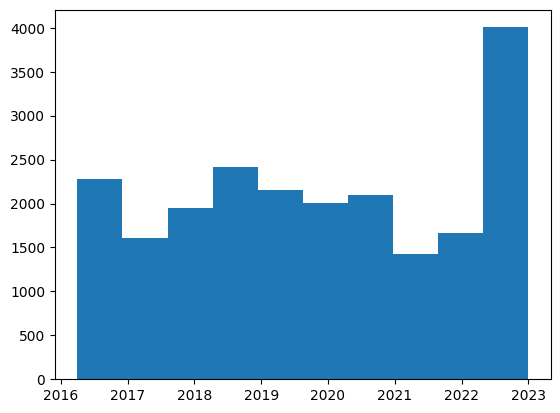

In [14]:
%matplotlib inline

plt.hist(df.created_at)
plt.show()